# Import Dependencies

In [241]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Read The Image

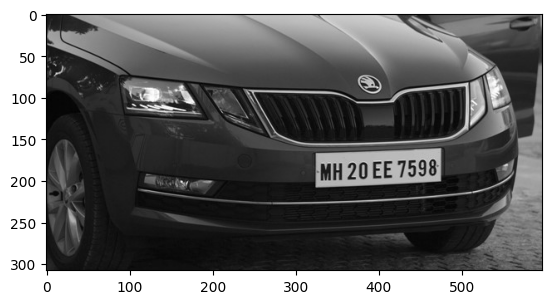

In [243]:
image = cv2.imread('image4.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Utilizing filters to detect and extract edges for object localization.

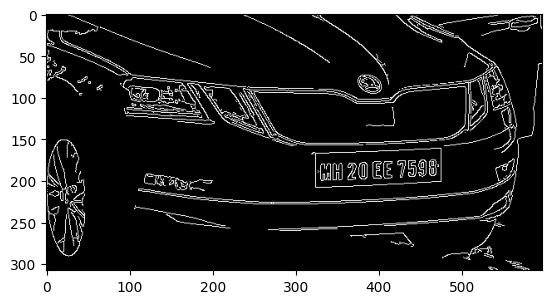

In [244]:
# filtering --> remove noise from the image
# edge detection --> detect edges within the image

filter = cv2.bilateralFilter(gray, 11, 17, 17)  # edge detection
edge = cv2.Canny(filter, 30, 200)  # edge detection
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

# Detecting contours in an image and using them to apply a mask

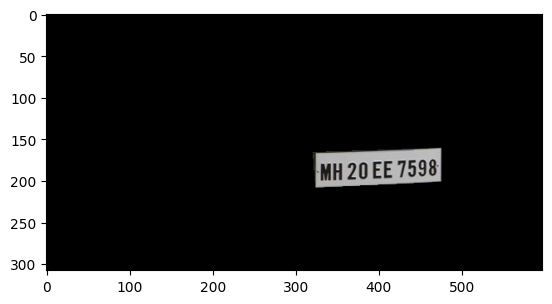

In [245]:
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

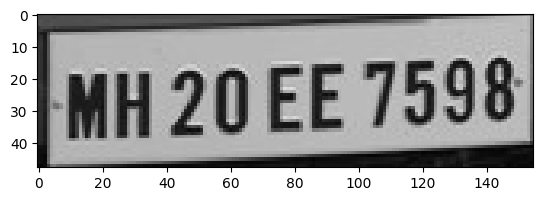

In [246]:
# we need only image of the plate. So we need to crop the image

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
crop_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))

# Utilizing the EasyOCR library for optical character recognition (OCR) to extract text from an image.

In [247]:
reader = easyocr.Reader(['en'])
result = reader.readtext(crop_image)
result

[([[5, 9], [155, 9], [155, 47], [5, 47]], 'MH 20EE 7598', 0.8168234246393938)]

# Result

In [248]:
# text = result[0][-2]
# font = cv2.FONT_HERSHEY_SIMPLEX
# res = cv2.putText(image, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(255,255,0), thickness=2, lineType=cv2.LINE_AA)
# res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (255,255,0),3)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

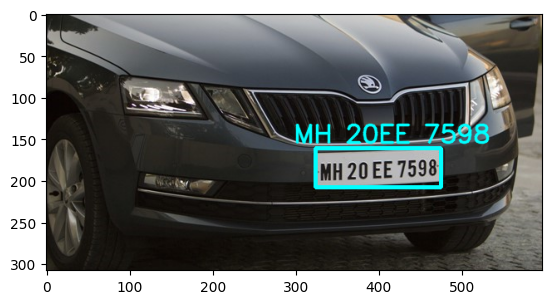

In [249]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
# Get the dimensions of the image
height, width, _ = image.shape
# Calculate the center coordinates of the image
center_x, center_y = int(width/2), int(height/2)
# Place the text at the center of the image
org = (center_x - int(len(text)*10), center_y)
res = cv2.putText(image, text=text, org=(center_x, center_y), fontFace=font, fontScale=1, color=(255,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (255,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))